<h2><u> Transformando os dados</h2></u>

In [1]:
import pandas as pd

In [2]:
# Importar os dados de um arquivo csv
df = pd.read_csv("c://users//marco//Tesouro_direto1.csv", sep=";")

In [3]:
# Mostra as 3 primeiras linhas do dataframe
df.head()

,Tipo Titulo,Vencimento do Titulo,Data Venda,PU,Quantidade,Valor
0,Tesouro IPCA+ com Juros Semestrais,15/08/2010,03/02/2009,"1826,714087",137,"250259,82"
1,Tesouro IPCA+,15/08/2024,03/02/2009,"637,46928",139,"88608,22"
2,Tesouro IPCA+ com Juros Semestrais,15/05/2011,03/02/2009,"1782,526531","349,4","622814,76"
3,Tesouro IPCA+ com Juros Semestrais,15/05/2035,03/02/2009,"1643,516141","25,4","41745,3"
4,Tesouro IPCA+ com Juros Semestrais,15/05/2015,03/02/2009,"1690,860123","291,4","492716,63"


In [4]:
# Alterar o display de precisão para mostrar apenas duas casas após o ponto decimal
pd.set_option("display.precision", 2)

In [5]:
# Renomeando as colunas para lowercase e sem espaço
df.rename(columns={'Tipo Titulo': 'tipo_titulo', 'Vencimento do Titulo': 'vencimento_do_titulo', 'Data Venda' : 'data_venda', 'PU' : 'pu', 'Quantidade' : 'quantidade', 'Valor' : 'valor'}, inplace=True)

In [6]:
# Alterar os valores do coluna para datetime
df["vencimento_do_titulo"] = pd.to_datetime(df["vencimento_do_titulo"], format="%d/%m/%Y")

In [7]:
# Alterar os valores do coluna para datetime
df["data_venda"] = pd.to_datetime(df["data_venda"], format="%d/%m/%Y")

In [8]:
# Alterar o separador de unidade de virgula para ponto
df.quantidade = df.quantidade.str.replace(",", ".")

In [9]:
# Alterar o separador de unidade de virgula para ponto
df.valor = df.valor.str.replace(",", ".")

In [10]:
# Alterar o separador de unidade de virgula para ponto
df.pu = df.pu.str.replace(",", ".")

In [11]:
# Alterar o formato da coluna para float
df.quantidade = df.quantidade.astype(float)

In [12]:
# Alterar o formato da coluna para float
df.valor = df.valor.astype(float)

In [13]:
# Alterar o formato da coluna para float
df.pu = df.pu.astype(float)

In [14]:
# Mostrar somente as 5 primeiras linhas do dataframe após todas as transformação dos dados
df.head()

,tipo_titulo,vencimento_do_titulo,data_venda,pu,quantidade,valor
0,Tesouro IPCA+ com Juros Semestrais,2010-08-15,2009-02-03,1826.71,137.0,250259.82
1,Tesouro IPCA+,2024-08-15,2009-02-03,637.47,139.0,88608.22
2,Tesouro IPCA+ com Juros Semestrais,2011-05-15,2009-02-03,1782.53,349.4,622814.76
3,Tesouro IPCA+ com Juros Semestrais,2035-05-15,2009-02-03,1643.52,25.4,41745.30
4,Tesouro IPCA+ com Juros Semestrais,2015-05-15,2009-02-03,1690.86,291.4,492716.63


<h2><u> Analisando os dados </h2></u>

In [15]:
# Mostra o formato dos valores das colunas do dataframe
df.dtypes

tipo_titulo                     object
vencimento_do_titulo    datetime64[ns]
data_venda              datetime64[ns]
pu                             float64
quantidade                     float64
valor                          float64
dtype: object

In [16]:
# Visualizar a quantidade de rows (56009) e columns (6)
df.shape

(56009, 6)

In [17]:
# Visualizar as colunas que estão contidas no dataframe
df.columns

Index(['tipo_titulo', 'vencimento_do_titulo', 'data_venda', 'pu', 'quantidade',
       'valor'],
      dtype='object')

In [18]:
# Mostra os valores únicos da coluna tipo_titulo do dataframe
df.tipo_titulo.unique()

array(['Tesouro IPCA+ com Juros Semestrais', 'Tesouro IPCA+',
       'Tesouro Prefixado com Juros Semestrais', 'Tesouro Selic',
       'Tesouro Prefixado', 'Tesouro IGPM+ com Juros Semestrais'], dtype=object)

In [19]:
# Mostra a quantidade de cada título contidos na coluna tipo_titulo do ano 2002 a 2017
df.tipo_titulo.value_counts()

Tesouro IPCA+ com Juros Semestrais        16865
Tesouro Prefixado                         12861
Tesouro IPCA+                              7654
Tesouro Prefixado com Juros Semestrais     7336
Tesouro Selic                              6813
Tesouro IGPM+ com Juros Semestrais         4480
Name: tipo_titulo, dtype: int64

In [20]:
# Mostra a menor data de venda dos titulos contidos no dataframe
df.data_venda.min()

Timestamp('2002-01-04 00:00:00')

In [21]:
# Mostra a maior data de venda dos titulos contidos no dataframe
df.data_venda.max()

Timestamp('2017-07-03 00:00:00')

In [22]:
# Mostra as 3 primeiras linhas do dataframe
df.head(3)

,tipo_titulo,vencimento_do_titulo,data_venda,pu,quantidade,valor
0,Tesouro IPCA+ com Juros Semestrais,2010-08-15,2009-02-03,1826.71,137.0,250259.82
1,Tesouro IPCA+,2024-08-15,2009-02-03,637.47,139.0,88608.22
2,Tesouro IPCA+ com Juros Semestrais,2011-05-15,2009-02-03,1782.53,349.4,622814.76


In [23]:
# Resultado mostra a quantidade de titulos vendidos de 04/01/2002 a 03/07/2017 (49.023.783,66 títulos)
titulos_vendidos = "%.2f" % df.quantidade.sum()
titulos_vendidos

'49023783.66'

In [25]:
# Resultado mostra o valor arrecado com a venda de todos os titulos de 04/01/2002 a 03/07/2017 (R$ 69.423.018.560,19)
valor_arrecadado = "%.2f" % df.valor.sum()
valor_arrecadado

'69423018560.19'

Visualização dos dados

In [26]:
# Criado variavel para enumerar a quantidade do titulo em questão foram adquiridos
tes_ipca_juros = df[df["tipo_titulo"] == "Tesouro IPCA+ com Juros Semestrais"]
tes_ipca_juros_v = len(tes_ipca_juros.tipo_titulo)
tes_ipca_juros_v

16865

In [27]:
# Criado variavel para enumerar a quantidade do titulo em questão foram adquiridos
tes_prefixado = df[df["tipo_titulo"] == "Tesouro Prefixado"]
tes_prefixado_v = len(tes_prefixado.tipo_titulo)
tes_prefixado_v

12861

In [28]:
# Criado variavel para enumerar a quantidade do titulo em questão foram adquiridos
tes_ipca = df[df["tipo_titulo"] == "Tesouro IPCA+"]
tes_ipca_v = len(tes_ipca.tipo_titulo)
tes_ipca_v

7654

In [29]:
# Criado variavel para enumerar a quantidade do titulo em questão foram adquiridos
tes_prefixado_juros = df[df["tipo_titulo"] == "Tesouro Prefixado com Juros Semestrais"]
tes_prefixado_juros_v = len(tes_prefixado_juros.tipo_titulo)
tes_prefixado_juros_v

7336

In [30]:
# Criado variavel para enumerar a quantidade do titulo em questão foram adquiridos
tes_selic = df[df["tipo_titulo"] == "Tesouro Selic"]
tes_selic_v = len(tes_selic.tipo_titulo)
tes_selic_v

6813

In [31]:
# Criado variavel para enumerar a quantidade do titulo em questão foram adquiridos
tes_igpm_juros = df[df["tipo_titulo"] == "Tesouro IGPM+ com Juros Semestrais"]
tes_igpm_juros_v = len(tes_igpm_juros.tipo_titulo)
tes_igpm_juros_v

4480

In [32]:
# Criado lista com os valores da quantidade de titulos comprados
titulos_tipos = [tes_ipca_juros_v, tes_prefixado_v, tes_ipca_v,tes_prefixado_juros_v, tes_selic_v, tes_igpm_juros_v]
titulos_tipos

[16865, 12861, 7654, 7336, 6813, 4480]

In [33]:
# Criado uma lista com os nomes dos tipos de titulos vendidos
titulos_nomes = ["Tesouro IPCA+ com Juros Semestrais","Tesouro Prefixado","Tesouro IPCA+","Tesouro Prefixado com Juros Semestrais","Tesouro Selic","Tesouro IGPM+ com Juros Semestrais"]
titulos_nomes

['Tesouro IPCA+ com Juros Semestrais',
 'Tesouro Prefixado',
 'Tesouro IPCA+',
 'Tesouro Prefixado com Juros Semestrais',
 'Tesouro Selic',
 'Tesouro IGPM+ com Juros Semestrais']

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

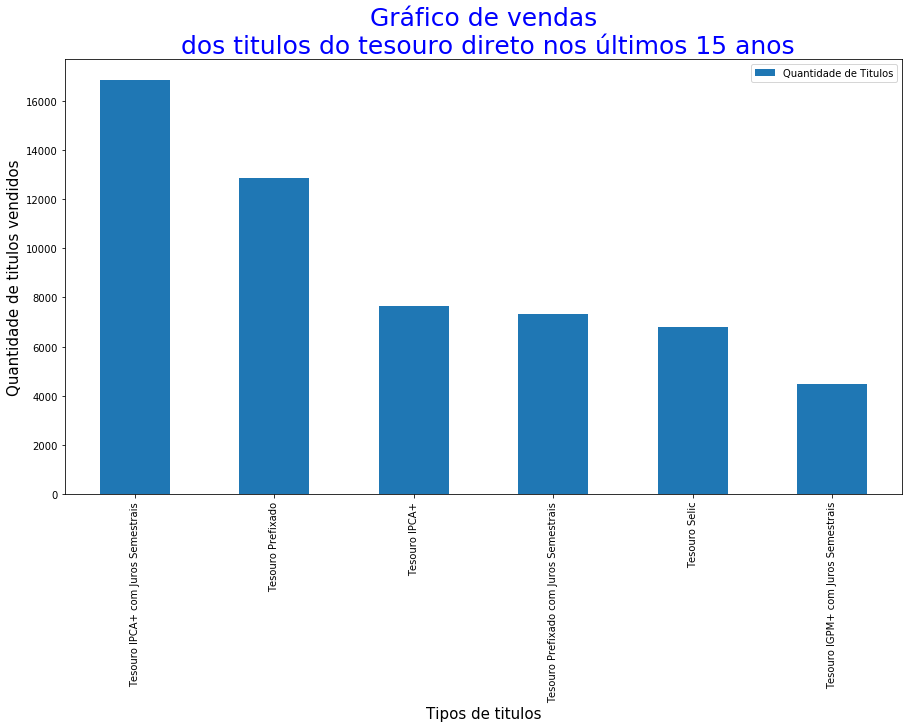

In [43]:
# Criado gráfico de barras para visualizar a quantidade de cada titulos vendidos
df1 = pd.DataFrame(titulos_tipos,titulos_nomes)
df1.plot(kind='bar',stacked=True, figsize=(15,8))
plt.xlabel("Tipos de titulos",size=15)
plt.ylabel("Quantidade de titulos vendidos",size=15)
plt.title("Gráfico de vendas\n dos titulos do tesouro direto nos últimos 15 anos",size=25, color="b")